## **En primer lugar importamos las librerías que vamos a necesitar.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
from matplotlib.figure import Figure
import plotly.graph_objects as go
from scipy.optimize import minimize

## **En el segundo paso importamos desde yahoo finance la data de los activos que seleccionemos.**

In [3]:
# Next we will get the stock tickers and the price data.

ticker = ['JPM', 'AAPL', 'WMT', 'TGT', 'MSFT', 'AMZN', 'META','JNJ', 'PG', 'DIS']
price_data = yf.download(ticker,
                         start='2014-01-01',
                         end='2023-05-31')['Adj Close']

price_data.columns = ticker

ticker_SP500 = '^GSPC'

SP500_data = yf.download(ticker_SP500,
                         start='2014-01-01',
                         end='2023-05-31')['Adj Close']

SP500_data.columns = ticker_SP500

print(price_data.head())
print()
print(SP500_data.head())

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed
                  JPM       AAPL        WMT        TGT       MSFT       AMZN  \
Date                                                                           
2014-01-02  17.341537  19.898500  70.192513  69.894485  44.318993  54.709999   
2014-01-03  16.960627  19.822001  70.045273  70.524086  44.661610  54.560001   
2014-01-06  17.053108  19.681499  69.778366  70.892647  44.920460  57.200001   
2014-01-07  16.931150  19.901501  70.256935  72.397575  44.402733  57.919998   
2014-01-08  17.038372  20.096001  69.226189  72.297752  44.821476  58.230000   

                 META        JNJ         PG        DIS  
Date                                                    
2014-01-02  31.354326  60.407982  48.036293  64.015549  
2014-01-03  31.143400  60.340469  48.271992  63.804604  
2014-01-06  30.485262  60.482986  47.945053  63.447662  
2014-01-07  30

## **En el tercer paso calculamos los retornos de cada uno de los activos, partiendo de la serie de precios que bajamos.**

In [4]:
returns_data = price_data.pct_change(1)

returns_data.dropna(inplace=True)

returns_SP500 = SP500_data.pct_change(1)

returns_SP500.dropna(inplace=True)

print(returns_data.head())
print()
print(returns_SP500.head())

                 JPM      AAPL       WMT       TGT      MSFT      AMZN  \
Date                                                                     
2014-01-03 -0.021965 -0.003845 -0.002098  0.009008  0.007731 -0.002742   
2014-01-06  0.005453 -0.007088 -0.003810  0.005226  0.005796  0.048387   
2014-01-07 -0.007152  0.011178  0.006858  0.021228 -0.011525  0.012587   
2014-01-08  0.006333  0.009773 -0.014671 -0.001379  0.009431  0.005352   
2014-01-09 -0.012770 -0.002264 -0.004254  0.006054 -0.001868 -0.017345   

                META       JNJ        PG       DIS  
Date                                                
2014-01-03 -0.006727 -0.001118  0.004907 -0.003295  
2014-01-06 -0.021133  0.002362 -0.006773 -0.005594  
2014-01-07  0.007750  0.009672 -0.002379  0.003069  
2014-01-08 -0.017852 -0.014492 -0.003497 -0.007904  
2014-01-09 -0.006432  0.002243  0.010368  0.003341  

Date
2014-01-03   -0.000333
2014-01-06   -0.002512
2014-01-07    0.006082
2014-01-08   -0.000212
2014-01-09  

## **En el cuarto paso calculamos el retorno promedio de los activos, así como su desviación estándar.**

In [5]:
Assets_Returns = (np.mean(returns_data)*252)
print('Annual Asset Returns')
print(Assets_Returns)

print()

Assets_Std = (np.std(returns_data)*np.sqrt(252))
print('Annual Standard Deviations')
print(Assets_Std)

print()



Annual Asset Returns
JPM     0.289221
AAPL    0.248322
WMT     0.061330
TGT     0.099986
MSFT    0.156719
AMZN    0.239816
META    0.288309
JNJ     0.107535
PG      0.154330
DIS     0.109534
dtype: float64

Annual Standard Deviations
JPM     0.288869
AAPL    0.333537
WMT     0.273957
TGT     0.180816
MSFT    0.274864
AMZN    0.378957
META    0.273740
JNJ     0.184423
PG      0.302045
DIS     0.210180
dtype: float64



C:\Users\Juan Carlos\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## **En este quinto paso calculamos el Ratio de Sharpe de cada uno de los activos con los que estamos trabajando, así como el del S&P500.**

In [6]:
risk_free_asset = 0.04

Sharpe_Ratios_Assets = (Assets_Returns - risk_free_asset) / Assets_Std

print('Sharpe Ratios')
print(Sharpe_Ratios_Assets)

print()

Sharpe_Ratio_SP500 = (np.mean(returns_SP500)*252 - risk_free_asset) / (np.std(returns_SP500)*np.sqrt(252))
print('S&P 500 Sharpe Ratio')
print(Sharpe_Ratio_SP500)

Sharpe Ratios
JPM     0.862746
AAPL    0.624584
WMT     0.077857
TGT     0.331750
MSFT    0.424643
AMZN    0.527279
META    0.907097
JNJ     0.366199
PG      0.378519
DIS     0.330832
dtype: float64

S&P 500 Sharpe Ratio
0.359274270533596


## **En el sexto paso convertimos los precios de los activos a Base 100, con el fin de poderlos apreciar mejor en una gráfica.**

In [7]:
# create price series
# Create a DataFrame with prices starting at 100 for each asset
Prices_Base100 = (1 + returns_data).cumprod() * 100
print(Prices_Base100.head())

print()

SP500_Base100 = (1 + returns_SP500).cumprod() * 100
print('S&P 500 Base 100')
print(SP500_Base100.head())

                  JPM        AAPL         WMT         TGT        MSFT  \
Date                                                                    
2014-01-03  97.803477   99.615549   99.790234  100.900787  100.773070   
2014-01-06  98.336772   98.909461   99.409985  101.428097  101.357132   
2014-01-07  97.633503  100.015078  100.091780  103.581241  100.188949   
2014-01-08  98.251796  100.992538   98.623323  103.438421  101.133788   
2014-01-09  96.997138  100.763879   98.203760  104.064616  100.944848   

                  AMZN       META         JNJ          PG        DIS  
Date                                                                  
2014-01-03   99.725831  99.327282   99.888239  100.490668  99.670478  
2014-01-06  104.551273  97.228247  100.124163   99.810060  99.112893  
2014-01-07  105.867299  97.981720  101.092602   99.572640  99.417029  
2014-01-08  106.433925  96.232530   99.627535   99.224454  98.631285  
2014-01-09  104.587831  95.613576   99.851013  100.253240  98.

## **En esta parte vamos a graficar los precios de los activos en base 100, así como el SP500, también en base 100.**

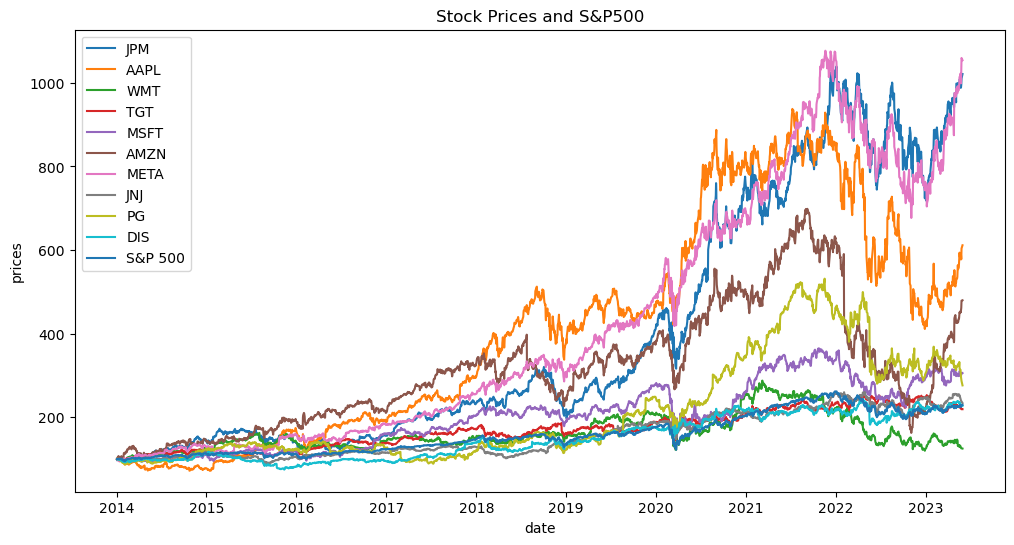

In [9]:
# Increase the size of the graph
plt.figure(figsize=(12, 6))

# plotting the points
plt.plot(Prices_Base100, label=(ticker))
plt.plot(SP500_Base100, label='S&P 500')

# naming the x axis
plt.xlabel('date')
# naming the y axis
plt.ylabel('prices')

# giving a title to my graph
plt.title('Stock Prices and S&P500')

# Adding legends based on column names in the DataFrame
plt.legend()


# function to show the plot
plt.show()

## **Ahora Calcularemos tanto la Matriz de Correlaciones como la Matriz de Varianza-Covarianza**

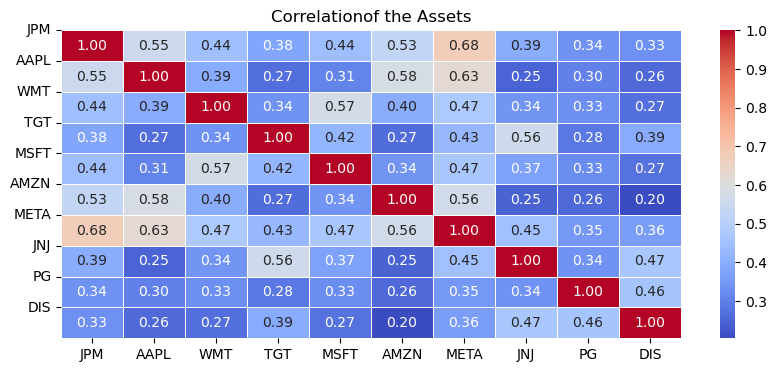


Matrix Variance-Covariance (Annual)
           JPM      AAPL       WMT       TGT      MSFT      AMZN      META  \
JPM   0.083481  0.053012  0.035173  0.019902  0.035188  0.057941  0.053478   
AAPL  0.053012  0.111294  0.035885  0.016042  0.028241  0.073436  0.057181   
WMT   0.035173  0.035885  0.075084  0.016774  0.043070  0.041147  0.035623   
TGT   0.019902  0.016042  0.016774  0.032708  0.020937  0.018196  0.021167   
MSFT  0.035188  0.028241  0.043070  0.020937  0.075582  0.035605  0.035337   
AMZN  0.057941  0.073436  0.041147  0.018196  0.035605  0.143669  0.058634   
META  0.053478  0.057181  0.035623  0.021167  0.035337  0.058634  0.074965   
JNJ   0.020988  0.015256  0.017225  0.018679  0.018726  0.017211  0.022655   
PG    0.029490  0.030341  0.027201  0.015558  0.027138  0.029382  0.028682   
DIS   0.020124  0.018065  0.015442  0.014870  0.015796  0.016222  0.020748   

           JNJ        PG       DIS  
JPM   0.020988  0.029490  0.020124  
AAPL  0.015256  0.030341  0.01

In [11]:
Mat_Correlaciones = returns_data.corr()

import seaborn as sns

plt.figure(figsize=(10, 4))
sns.heatmap(Mat_Correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.xticks(
    ticks=np.arange(0.5, len(ticker), 1),
    labels=ticker,
    rotation=0,
    ha='center')

plt.yticks(range(len(ticker)), ticker, rotation=0)

plt.title('Correlationof the Assets')
plt.show()

print()
print('Matrix Variance-Covariance (Annual)')
Mat_Var_Covar = returns_data.cov()*252
print(Mat_Var_Covar)


## **Ahora vamos a calcular el retorno y varianza de un portafolio de pesos iguales (Equally Weighted)**

In [12]:
num_assets = len(ticker)
W_equal = np.ones(num_assets) / num_assets
print(W_equal)

print()

print('Return of an Equally Weighted Portfolio')
Return_Equally_Weighted = np.dot(W_equal, Assets_Returns)
print(f"{Return_Equally_Weighted:.2%}")

print()

print('Variance of an Equally Weighted Portfolio')
Variance_Equally_Weighted = np.dot(np.dot(W_equal, Mat_Var_Covar), W_equal.T)
print(f"{Variance_Equally_Weighted:.2%}")

print()

print('Sharpe Ratio of an Equally Weighted Portfolio')
SR_Equally_Weighted = (Return_Equally_Weighted - risk_free_asset) / np.sqrt(Variance_Equally_Weighted)
print(f"{SR_Equally_Weighted:.2}")

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Return of an Equally Weighted Portfolio
17.55%

Variance of an Equally Weighted Portfolio
3.36%

Sharpe Ratio of an Equally Weighted Portfolio
0.74


## **A continuación simulamos muchos vectores W y para cada uno, calculamos el retorno del portafolio de riesgo, su desviación estándar y el Ratio de Sharpe**

In [13]:
# Simulating 100000 portfolios
num_port = 200000

# Creating an empty array to store portfolio weights
all_weights = np.zeros((num_port, len(ticker)))

# Creating an empty array to store portfolio returns
returns = np.zeros((num_port))

# Creating an empty array to store portfolio risks
stand_dev = np.zeros((num_port))

# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

# Lets run the for loop.
for i in range(num_port):
  weights = np.array(np.random.random(num_assets))
  weights = weights/np.sum(weights)

  # saving weights in the array
  all_weights[i,:] = weights

  # Saving Portfolio returns
  returns[i] = np.dot(weights, Assets_Returns)

  # Portfolio Risk
  stand_dev[i]= np.sqrt(np.dot(np.dot(weights, Mat_Var_Covar), weights.T))

  # Portfolio Sharpe Ratio
  sharpe_ratio[i] = (returns[i] - risk_free_asset) / stand_dev[i]


## **Seguidamente vamos a seleccionar el portafolio que tenga el máximo Ratio de Sharpe y ese será el portafolio óptimo**

      optimal weight
JPM         0.303967
AAPL        0.101685
WMT         0.016029
TGT         0.081794
MSFT        0.008896
AMZN        0.014560
META        0.279737
JNJ         0.012726
PG          0.029836
DIS         0.150770

Sharpe Ratio Óptimo = 0.9145617262087433

JPM     0.862746
AAPL    0.624584
WMT     0.077857
TGT     0.331750
MSFT    0.424643
AMZN    0.527279
META    0.907097
JNJ     0.366199
PG      0.378519
DIS     0.330832
dtype: float64


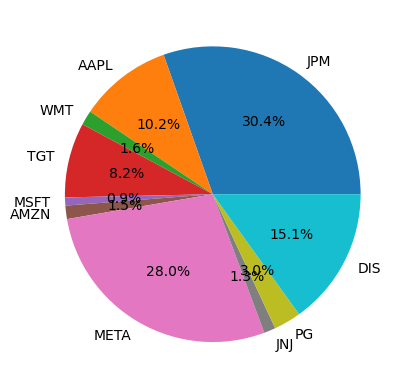

In [16]:
sharpe_ratio.max()

sharpe_ratio.argmax()

optimal_weights = all_weights[sharpe_ratio.argmax(),:]

return_optimal_portfolio = returns[sharpe_ratio.argmax()]

std_dev_optimal_portfolio = stand_dev[sharpe_ratio.argmax()]

df = pd.DataFrame(optimal_weights, columns=['optimal weight'], index=ticker)

print(df)
print()
print(f'Sharpe Ratio Óptimo = {sharpe_ratio.max()}')
print()
print(Sharpe_Ratios_Assets)

plt.pie(optimal_weights, labels=ticker, autopct='%1.1f%%')

plt.show()


## **Ahora vamos a graficar todos los portafolios simulados**

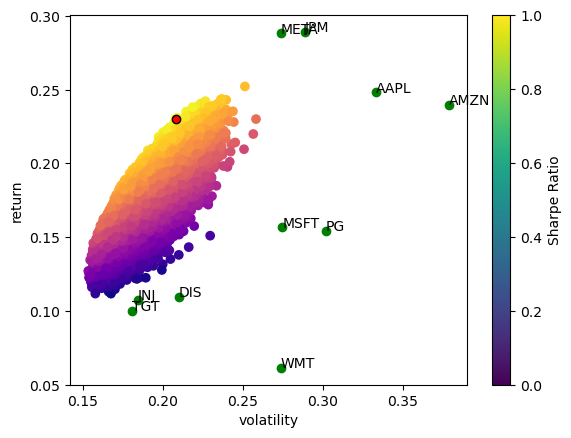

In [18]:
plt.scatter(stand_dev, returns, c=sharpe_ratio, cmap='plasma')
plt.scatter(Assets_Std, Assets_Returns, c='green')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('volatility')
plt.ylabel('return')

labels = ticker
for i, label in enumerate(labels):
    plt.text(Assets_Std[i], Assets_Returns[i], label)

plt.scatter(std_dev_optimal_portfolio, return_optimal_portfolio, c='red', edgecolors='black')